<a href="https://colab.research.google.com/github/Crptosad/Automated-Message-in-Messenger/blob/main/heart_diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install seaborn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from __future__ import absolute_import, division, print_function

import pathlib

import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.12.0


In [ ]:
import tensorflow.keras as keras

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/hearthert.csv'
column_names = ['Age', 'Sex', 'Chest Pain Type', 'Resting Blood Pressure', 'Cholesterol',
                'Fasting Blood Sugar', 'Resting Electrocardiographic Results',
                'Maximum Heart Rate Achieved', 'Exercise Induced Angina', 'ST Depression Induced By Exercise Relative To Rest',
                'The Slope Of The Peak Exercise ST Segment', 'Number Of Major Vessels', 'Thal', 'Diagnosis Of Heart Disease']

raw_dataset = pd.read_csv('hearthert.csv', names=None, na_values='?', comment='\t',
                          sep=',', skipinitialspace=True)

new_column_names = ['Age', 'Sex', 'Chest Pain Type', 'Resting Blood Pressure', 'Cholesterol', 
                    'Fasting Blood Sugar', 'Resting Electrocardiographic Results', 
                    'Maximum Heart Rate Achieved', 'Exercise Induced Angina', 
                    'ST Depression Induced by Exercise Relative to Rest', 
                    'Slope of the Peak Exercise ST Segment', 'Number of Major Vessels', 
                    'Thal', 'Diagnosis of Heart Disease']

dataset = raw_dataset.copy()
dataset.columns = new_column_names

dataset.dropna(inplace=True)
dataset.head()

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,Resting Electrocardiographic Results,Maximum Heart Rate Achieved,Exercise Induced Angina,ST Depression Induced by Exercise Relative to Rest,Slope of the Peak Exercise ST Segment,Number of Major Vessels,Thal,Diagnosis of Heart Disease
1,63.0,1.0,12.0,145.0,233.0,13.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,4.0
2,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
3,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
4,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
5,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [ ]:
dataset.isna().sum()

Age                                                   0
Sex                                                   0
Chest Pain Type                                       0
Resting Blood Pressure                                0
Cholesterol                                           0
Fasting Blood Sugar                                   0
Resting Electrocardiographic Results                  0
Maximum Heart Rate Achieved                           0
Exercise Induced Angina                               0
ST Depression Induced by Exercise Relative to Rest    0
Slope of the Peak Exercise ST Segment                 0
Number of Major Vessels                               0
Thal                                                  0
Diagnosis of Heart Disease                            0
dtype: int64

In [ ]:
dataset = dataset.dropna()

Split data into training and test

In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

Inspect the data

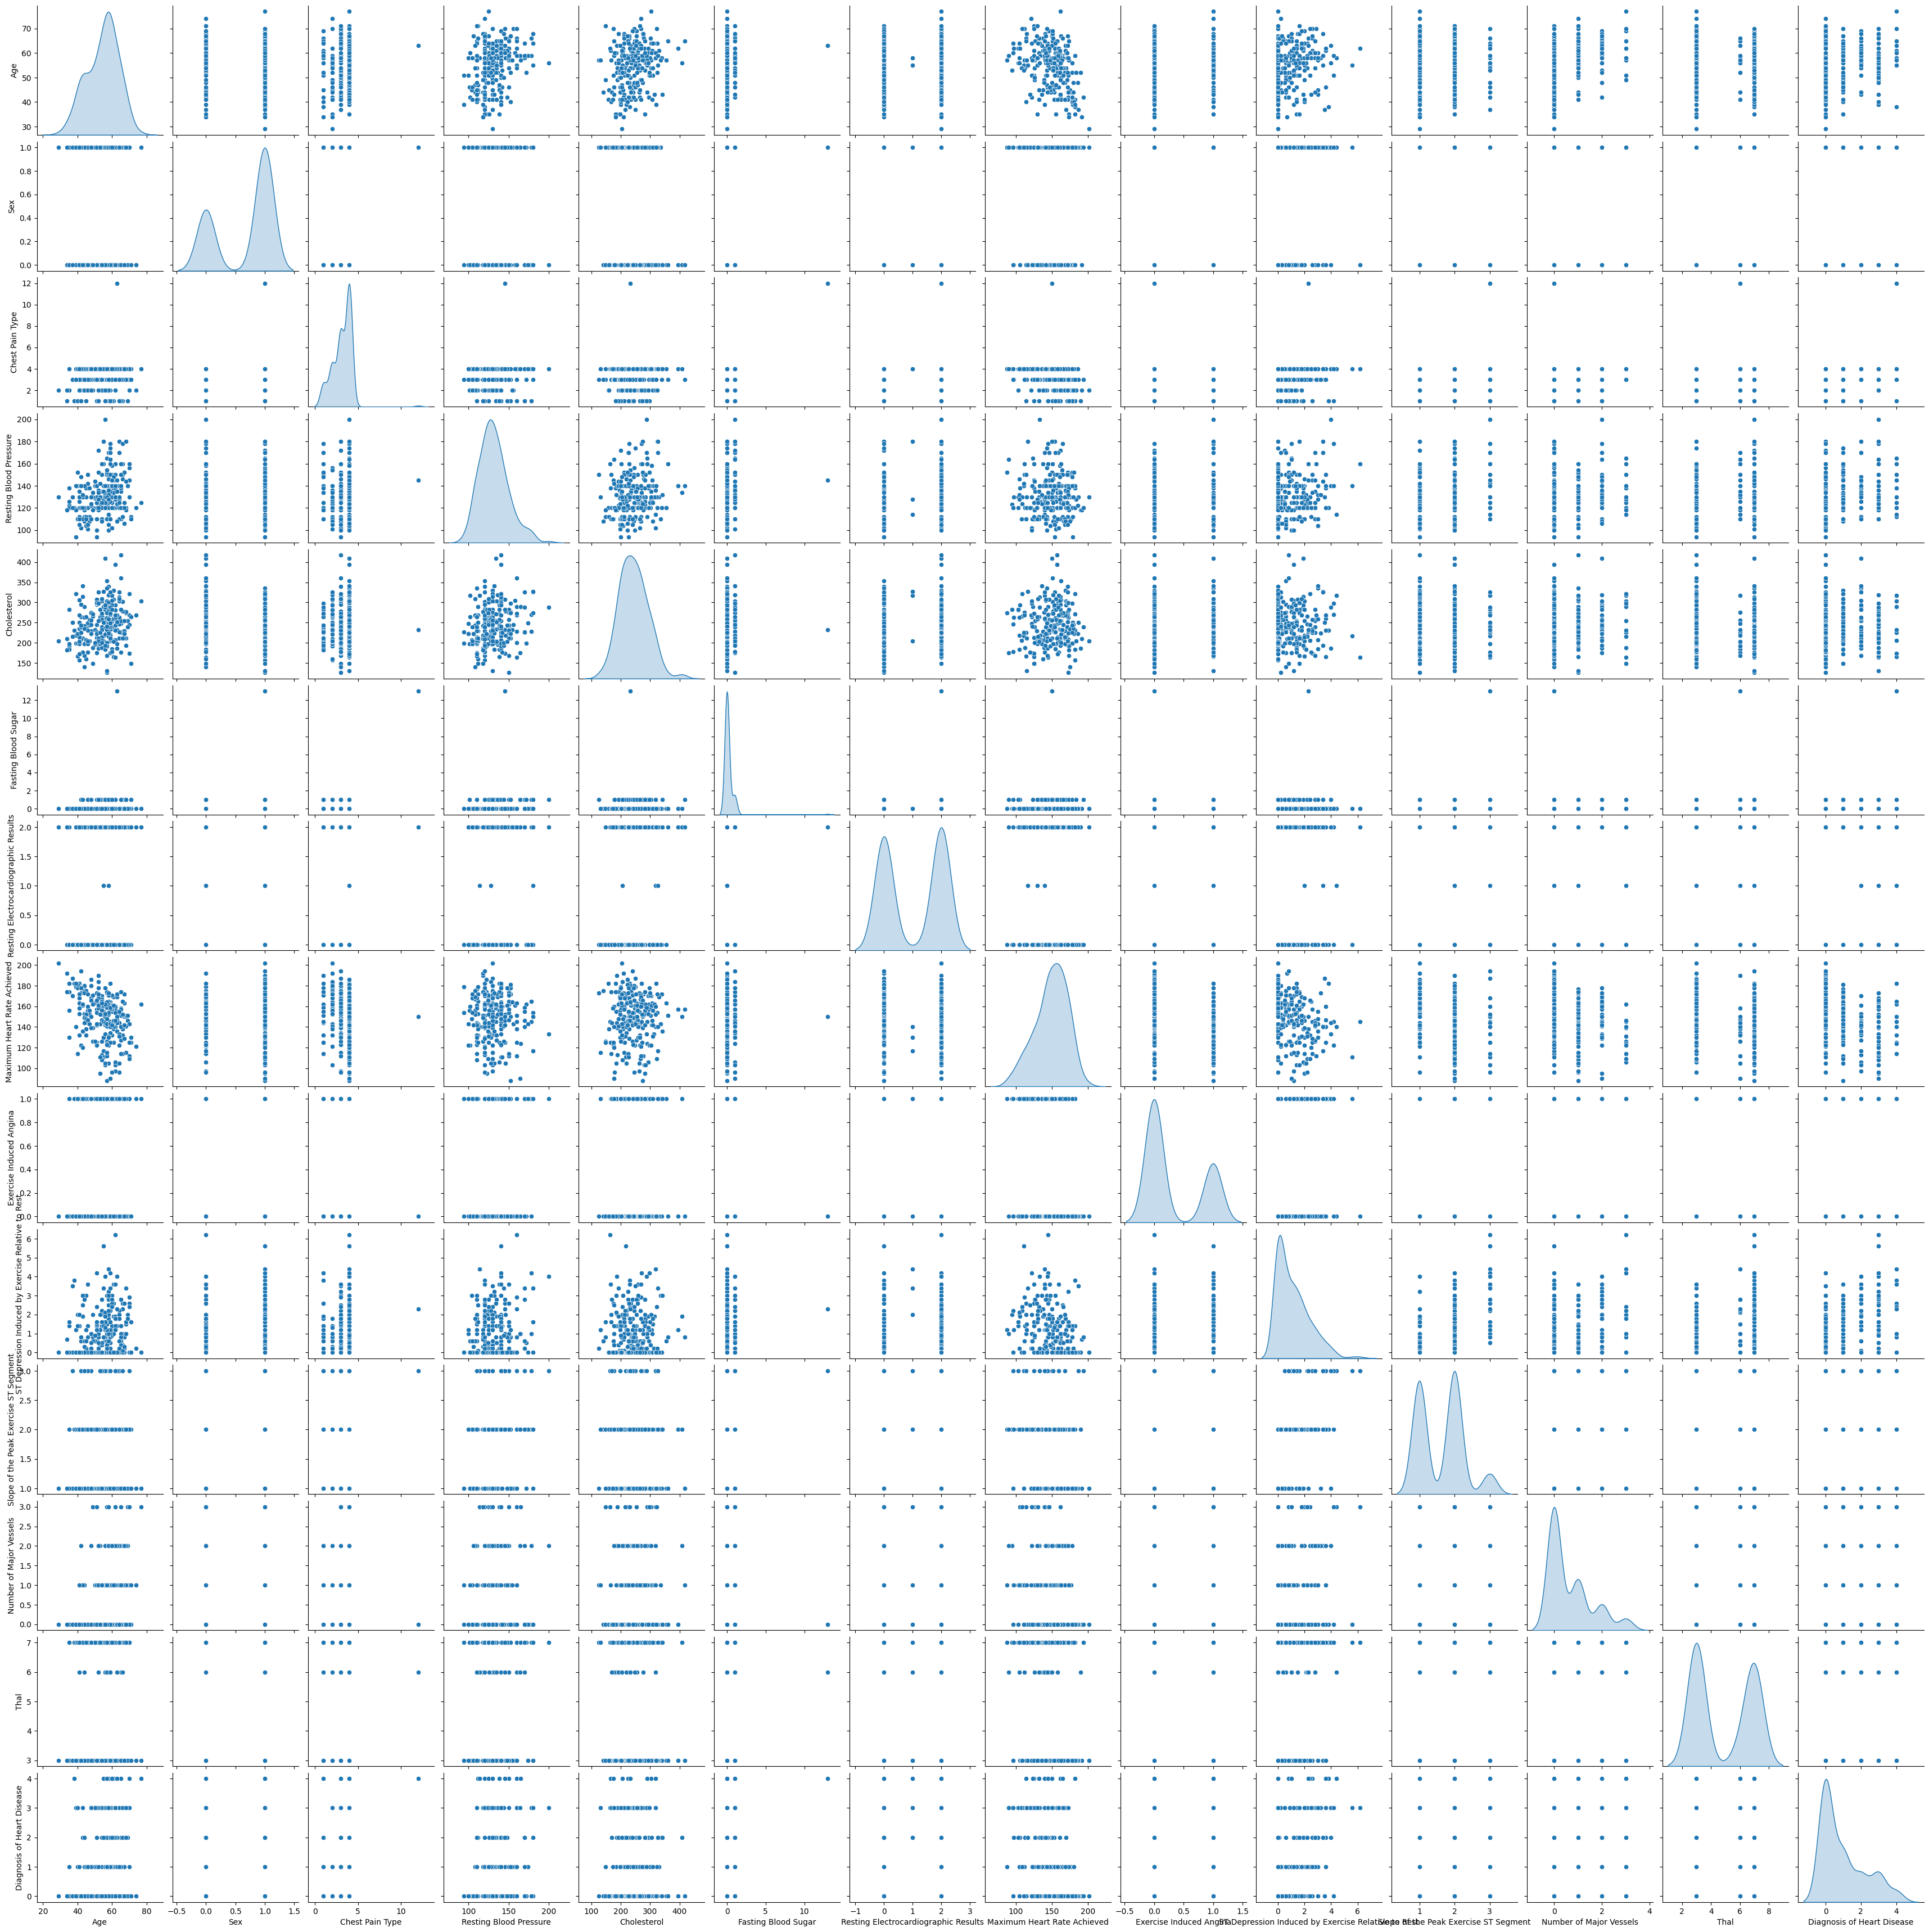

In [ ]:
sns.pairplot(train_dataset[['Age', 'Sex', 'Chest Pain Type', 'Resting Blood Pressure', 'Cholesterol',
                'Fasting Blood Sugar', 'Resting Electrocardiographic Results',
                'Maximum Heart Rate Achieved', 'Exercise Induced Angina', 'ST Depression Induced by Exercise Relative to Rest',
                'Slope of the Peak Exercise ST Segment', 'Number of Major Vessels', 'Thal', 'Diagnosis of Heart Disease']], diag_kind='kde')

check overall stats

In [ ]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,238.0,54.521008,9.129956,29.0,48.0,56.0,61.0,77.0
Sex,238.0,0.668067,0.471899,0.0,0.0,1.0,1.0,1.0
Chest Pain Type,238.0,3.168067,1.138652,1.0,3.0,3.0,4.0,12.0
Resting Blood Pressure,238.0,131.457983,18.032446,94.0,120.0,130.0,140.0,200.0
Cholesterol,238.0,244.134454,49.148775,126.0,208.0,240.0,274.0,417.0
Fasting Blood Sugar,238.0,0.189076,0.901222,0.0,0.0,0.0,0.0,13.0
Resting Electrocardiographic Results,238.0,1.037815,0.995050,0.0,0.0,2.0,2.0,2.0
Maximum Heart Rate Achieved,238.0,149.180672,22.473729,88.0,136.0,152.0,165.0,202.0
Exercise Induced Angina,238.0,0.323529,0.468809,0.0,0.0,0.0,1.0,1.0
ST Depression Induced by Exercise Relative to Rest,238.0,1.129832,1.205120,0.0,0.0,0.8,1.8,6.2


split features from labels

In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Diagnosis of Heart Disease')
test_labels = test_features.pop('Diagnosis of Heart Disease')

Normalization

In [ ]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
Age,54.521008,9.129956
Sex,0.668067,0.471899
Chest Pain Type,3.168067,1.138652
Resting Blood Pressure,131.457983,18.032446
Cholesterol,244.134454,49.148775
Fasting Blood Sugar,0.189076,0.901222
Resting Electrocardiographic Results,1.037815,0.995050
Maximum Heart Rate Achieved,149.180672,22.473729
Exercise Induced Angina,0.323529,0.468809
ST Depression Induced by Exercise Relative to Rest,1.129832,1.205120


The normalization layer

The tf.keras.layers.Normalization is a clean and simple way to add feature normalization into your model.

The first step is to create the layer:

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)

Then, fit the state of the preprocessing layer to the data by calling Normalization.adapt:

In [ ]:
import numpy as np
normalizer.adapt(np.array(train_features))

Calculate the mean and variance, and store them in the layer

In [ ]:
print(normalizer.mean.numpy())

[[5.4521008e+01 6.6806734e-01 3.1680677e+00 1.3145799e+02 2.4413448e+02
  1.8907565e-01 1.0378152e+00 1.4918069e+02 3.2352942e-01 1.1298321e+00
  1.6386557e+00 6.4705884e-01 4.8529415e+00]]


When the layer is called, it returns the input data, with each feature independently normalized:

In [ ]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())


First example: [[ 52.   1.   1. 118. 186.   0.   2. 190.   0.   0.   2.   0.   6.]]

Normalized: [[-0.28  0.7  -1.91 -0.75 -1.19 -0.21  0.97  1.82 -0.69 -0.94  0.58 -0.72
   0.59]]


LINEAR REGRESSION

Before building a deep neural network model, start with linear regression using one and several variables.

Linear regression with one variable
Begin with a single-variable linear regression to predict 'Diagnosis of Heart Disease' from 'Number of Major Vessels'.

Training a model with tf.keras typically starts by defining the model architecture. Use a tf.keras.Sequential model, which represents a sequence of steps.

There are two steps in your single-variable linear regression model:

Normalize the 'Number of Major Vessels' input features using the tf.keras.layers.Normalization preprocessing layer.
Apply a linear transformation (
) to produce 1 output using a linear layer (tf.keras.layers.Dense).
The number of inputs can either be set by the input_shape argument, or automatically when the model is run for the first time.

First, create a NumPy array made of the 'Number of Major Vessels' features. Then, instantiate the tf.keras.layers.Normalization and fit its state to the Number of Major Vessels data:

In [ ]:
Number_of_Major_Vessels = np.array(train_features['Number of Major Vessels'])

Number_of_Major_Vessels_normalizer = layers.Normalization(input_shape=[1,], axis=None)
Number_of_Major_Vessels_normalizer.adapt(Number_of_Major_Vessels)

Build the Keras Sequential model:



In [ ]:
Number_of_Major_Vessels_model = tf.keras.Sequential([
    Number_of_Major_Vessels_normalizer,
    layers.Dense(units=1)
])

Number_of_Major_Vessels_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


This model will predict 'Diagnosis of Heart Disease' from 'Number of Major Vessels'.

Run the untrained model on the first 10 'Number of Major Vessels' values. The output won't be good, but notice that it has the expected shape of (10, 1):

In [ ]:
Number_of_Major_Vessels_model.predict(Number_of_Major_Vessels[:10])

1/1 [==============================] - 0s 189ms/step


array([[ 0.15623356],
       [ 0.15623356],
       [-0.0852183 ],
       [ 0.15623356],
       [ 0.15623356],
       [-0.0852183 ],
       [ 0.15623356],
       [ 0.15623356],
       [-0.56812197],
       [ 0.15623356]], dtype=float32)

Once the model is built, configure the training procedure using the Keras Model.compile method. The most important arguments to compile are the loss and the optimizer, since these define what will be optimized (mean_absolute_error) and how (using the tf.keras.optimizers.Adam).

In [ ]:
Number_of_Major_Vessels_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

Use Keras Model.fit to execute the training for 100 epochs:

In [ ]:
%%time
history = Number_of_Major_Vessels_model.fit(
    train_features['Number of Major Vessels'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 4.81 s, sys: 177 ms, total: 4.99 s
Wall time: 10.8 s


Visualize the model's training progress using the stats stored in the history object:

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,0.652574,0.877252,95
96,0.652833,0.877127,96
97,0.655748,0.877370,97
98,0.655265,0.878716,98
99,0.655626,0.877714,99


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Diagnosis of Heart Disease]')
  plt.legend()
  plt.grid(True)

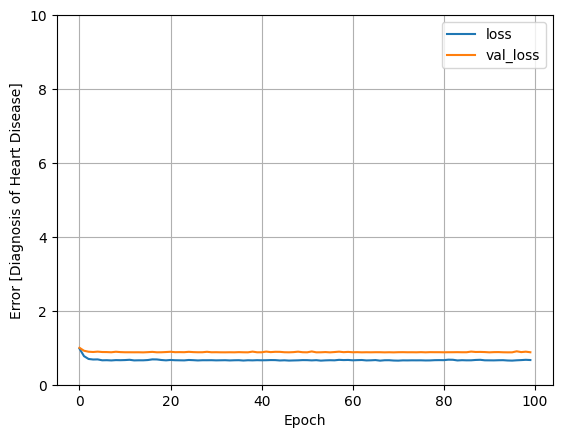

In [ ]:
import matplotlib.pyplot as plt

plot_loss(history)

Collect the results on the test set for later:

In [ ]:
test_results = {}

test_results['Number_of_Major_Vessels_model'] = Number_of_Major_Vessels_model.evaluate(
    test_features['Number of Major Vessels'],
    test_labels, verbose=0)

Since this is a single variable regression, it's easy to view the model's predictions as a function of the input:

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = Number_of_Major_Vessels_model.predict(x)

8/8 [==============================] - 0s 2ms/step


In [ ]:
def plot_Number_of_Major_Vessels(x, y):
  plt.scatter(train_features['Number of Major Vessels'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Number of Major Vessels')
  plt.ylabel('Diagnosis of Heart Disease')
  plt.legend()

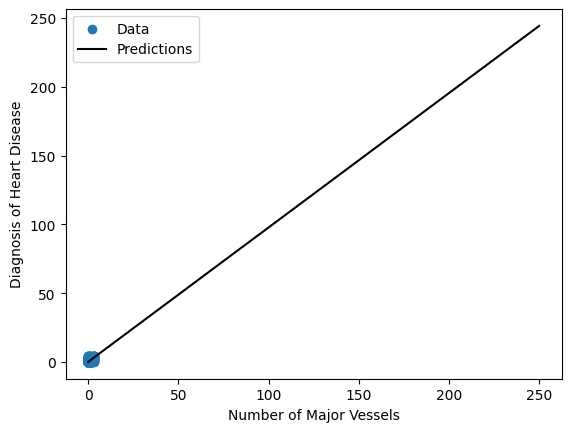

In [ ]:
plot_Number_of_Major_Vessels(x, y)

Linear regression with multiple inputs
You can use an almost identical setup to make predictions based on multiple inputs. This model still does the same 
 except that 
 is a matrix and 
 is a vector.

Create a two-step Keras Sequential model again with the first layer being normalizer (tf.keras.layers.Normalization(axis=-1)) you defined earlier and adapted to the whole dataset:

In [ ]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

When you call Model.predict on a batch of inputs, it produces units=1 outputs for each example:

In [ ]:
linear_model.predict(train_features[:10])

1/1 [==============================] - 0s 83ms/step


array([[ 0.7464414 ],
       [-2.0607915 ],
       [ 2.3407493 ],
       [-0.27510017],
       [ 1.4668988 ],
       [-1.8689965 ],
       [ 0.5681993 ],
       [ 0.16331759],
       [ 1.2952765 ],
       [-0.02303965]], dtype=float32)

When you call the model, its weight matrices will be built—check that the kernel weights (the 
 in 
) have a shape of (9, 1):

In [ ]:
linear_model.layers[1].kernel

<tf.Variable 'dense_1/kernel:0' shape=(13, 1) dtype=float32, numpy=
array([[ 0.3815254 ],
       [ 0.5947865 ],
       [-0.6510104 ],
       [ 0.46064615],
       [ 0.24216747],
       [ 0.5314332 ],
       [ 0.19436747],
       [-0.09433419],
       [ 0.51814795],
       [-0.15216535],
       [ 0.6023611 ],
       [ 0.08529967],
       [-0.26138204]], dtype=float32)>

Configure the model with Keras Model.compile and train with Model.fit for 100 epochs

In [ ]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 5.9 s, sys: 187 ms, total: 6.09 s
Wall time: 6.75 s


Using all the inputs in this regression model achieves a much lower training and validation error than the Number_of_Major_Vessels, which had one input:

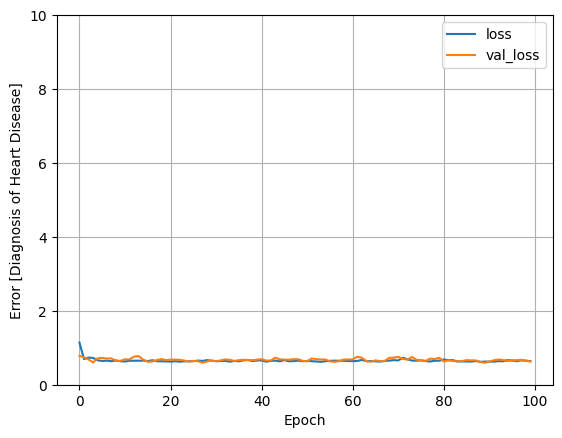

In [ ]:
plot_loss(history)

Collect the results on the test set for later:

In [ ]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

Regression with a deep neural network (DNN)
In the previous section, you implemented two linear models for single and multiple inputs.

Here, you will implement single-input and multiple-input DNN models.

The code is basically the same except the model is expanded to include some "hidden" non-linear layers. The name "hidden" here just means not directly connected to the inputs or outputs.

These models will contain a few more layers than the linear model:

The normalization layer, as before (with Number_of_Major_Vessels_normalizer for a single-input model and normalizer for a multiple-input model).
Two hidden, non-linear, Dense layers with the ReLU (relu) activation function nonlinearity.
A linear Dense single-output layer.
Both models will use the same training procedure, so the compile method is included in the build_and_compile_model function below.

In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

Regression using a DNN and a single input
Create a DNN model with only 'Number of Majot Vessels' as input and Number_of_Major_Vessels_normalizer (defined earlier) as the normalization layer:

In [ ]:
dnn_Number_of_Major_Vessels_model = build_and_compile_model(Number_of_Major_Vessels_normalizer)

This model has quite a few more trainable parameters than the linear models:

In [ ]:
dnn_Number_of_Major_Vessels_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                128       
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


Train the model with Keras Model.fit:

In [ ]:
%%time
history = dnn_Number_of_Major_Vessels_model.fit(
    train_features['Number of Major Vessels'],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 5.73 s, sys: 213 ms, total: 5.95 s
Wall time: 6.55 s


This model does slightly better than the linear single-input Number_of_Major_Vessels_model:

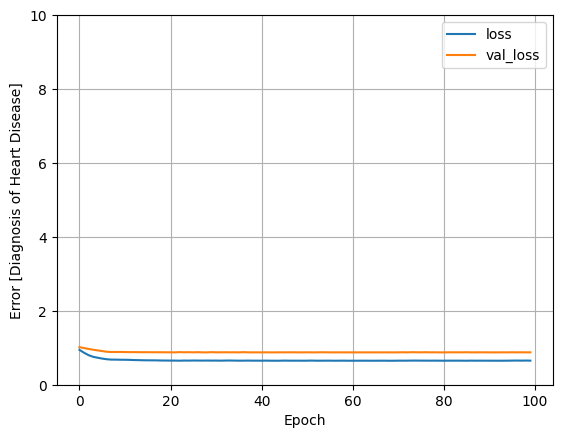

In [ ]:
plot_loss(history)

If you plot the predictions as a function of 'Number of Majoy Vessels', you should notice how this model takes advantage of the nonlinearity provided by the hidden layers:

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = dnn_Number_of_Major_Vessels_model.predict(x)

8/8 [==============================] - 0s 4ms/step


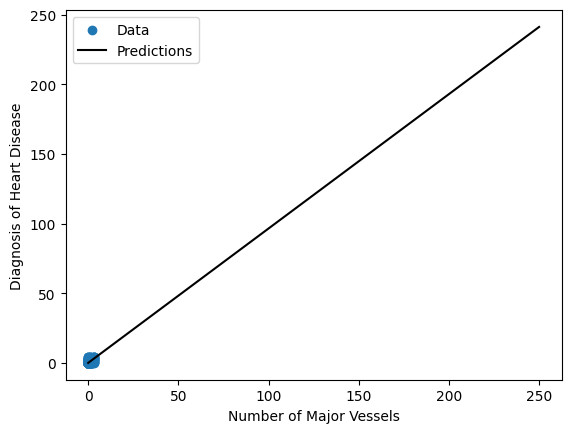

In [ ]:
plot_Number_of_Major_Vessels(x, y)

Collect the results on the test set for later:

In [ ]:
test_results['dnn_Number_of_Major_Vessels_model'] = dnn_Number_of_Major_Vessels_model.evaluate(
    test_features['Number of Major Vessels'], test_labels,
    verbose=0)

Regression using a DNN and multiple inputs
Repeat the previous process using all the inputs. The model's performance slightly improves on the validation dataset.

In [ ]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense_5 (Dense)             (None, 64)                896       
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,148
Trainable params: 5,121
Non-trainable params: 27
_________________________________________________________________


In [ ]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 6.26 s, sys: 192 ms, total: 6.45 s
Wall time: 7.77 s


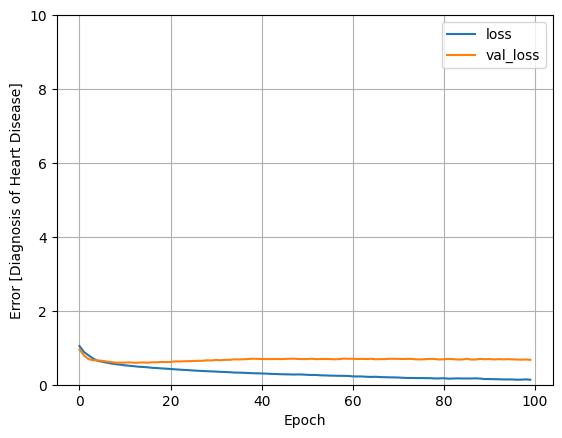

In [ ]:
plot_loss(history)

Collect the results on the test set:

In [ ]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

Performance
Since all models have been trained, you can review their test set performance:

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [Diagnosis of Heart Disease]']).T

,Mean absolute error [Diagnosis of Heart Disease]
Number_of_Major_Vessels_model,0.683019
linear_model,0.613974
dnn_Number_of_Major_Vessels_model,0.672375
dnn_model,0.664225


These results match the validation error observed during training.

Make predictions
You can now make predictions with the dnn_model on the test set using Keras Model.predict and review the loss:

2/2 [==============================] - 0s 6ms/step


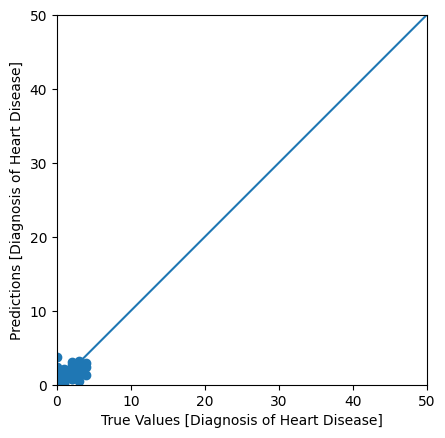

In [ ]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Diagnosis of Heart Disease]')
plt.ylabel('Predictions [Diagnosis of Heart Disease]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

It appears that the model predicts reasonably well.

Now, check the error distribution:

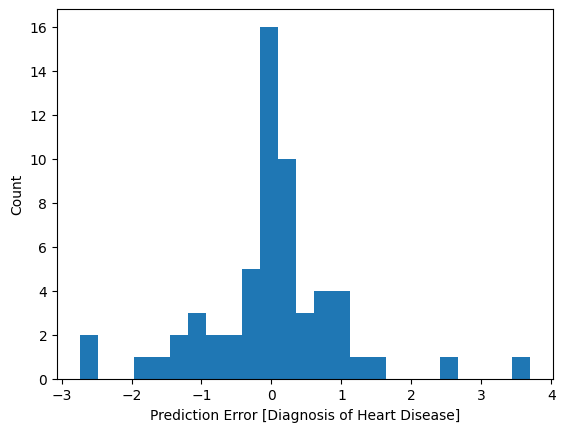

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [Diagnosis of Heart Disease]')
_ = plt.ylabel('Count')

If you're happy with the model, save it for later use with Model.save:

In [ ]:
dnn_model.save('dnn_model')

If you reload the model, it gives identical output:

In [ ]:
reloaded = tf.keras.models.load_model('dnn_model')

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [Diagnosis of Heart Disease]']).T

,Mean absolute error [Diagnosis of Heart Disease]
Number_of_Major_Vessels_model,0.683019
linear_model,0.613974
dnn_Number_of_Major_Vessels_model,0.672375
dnn_model,0.664225
reloaded,0.664225


Conclusion
This notebook introduced a few techniques to handle a regression problem. Here are a few more tips that may help:

Mean squared error (MSE) (tf.keras.losses.MeanSquaredError) and mean absolute error (MAE) (tf.keras.losses.MeanAbsoluteError) are common loss functions used for regression problems. MAE is less sensitive to outliers. Different loss functions are used for classification problems.
Similarly, evaluation metrics used for regression differ from classification.
When numeric input data features have values with different ranges, each feature should be scaled independently to the same range.
Overfitting is a common problem for DNN models, though it wasn't a problem for this tutorial. Visit the Overfit and underfit tutorial for more help with this.